In [1]:
!unzip -n "/workspace/colab/multi.zip" -d "/workspace/colab/multi"

Archive:  /workspace/colab/multi.zip


In [2]:
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
EPOCHS = 300
BATCH_SIZE = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_dir ="/workspace/colab/multi/multi/train"
valid_dir = "/workspace/colab/multi/multi/validation"

train_datagen=ImageDataGenerator(rescale=1./255.0,rotation_range=40,width_shift_range=0.3,height_shift_range=0.3,zoom_range=0.2,horizontal_flip=True)
valid_datagen=ImageDataGenerator(rescale=1./255.0)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=BATCH_SIZE,class_mode='binary')
valid_generator=valid_datagen.flow_from_directory(valid_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=BATCH_SIZE,class_mode='binary')


train_num = train_generator.samples
valid_num = valid_generator.samples

2022-12-19 10:36:28.055999: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Found 300 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [3]:
img=load_img('/workspace/colab/multi/multi/train/mouse/mouse(1).jpg')

data=img_to_array(img)
img_data=np.expand_dims(data,axis=0)
sample_datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
train_sample_iter=sample_datagen.flow(img_data,batch_size=1)

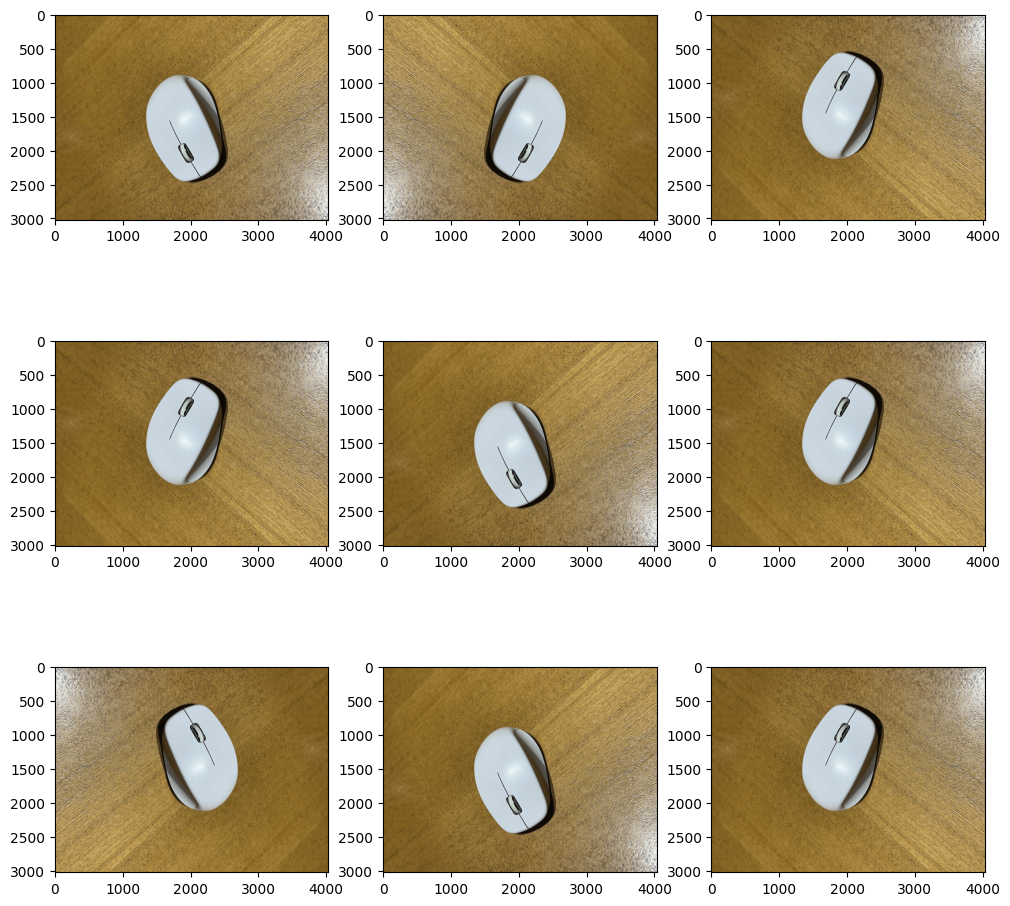

In [4]:
fig=plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch=next(iter(train_sample_iter))
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [5]:
from keras import models
from keras import layers

model = models.Sequential(name='multi')
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1),name='CNN_Layer1',input_shape=(150,150,3)))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1),name='CNN_Layer2'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),name='CNN_Layer3'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1),name='CNN_Layer4'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu',name='FC_Layer1'))
model.add(layers.Dense(4,activation='softmax',name='FC_Layer2_Output'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics='accuracy')
model.summary()

Model: "multi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_Layer1 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 CNN_Layer2 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 CNN_Layer3 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0     

2022-12-19 10:36:39.152085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 10:36:39.598162: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9191 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5


In [6]:
from keras.callbacks import EarlyStopping

history= model.fit(train_generator,steps_per_epoch=train_num//BATCH_SIZE, epochs=EPOCHS, validation_data=valid_generator)


Epoch 1/300


2022-12-19 10:36:45.911799: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


6/6 [==============================] - 20s 3s/step - loss: 1.3884 - accuracy: 0.2300 - val_loss: 1.3886 - val_accuracy: 0.1500
Epoch 2/300
6/6 [==============================] - 16s 3s/step - loss: 1.3836 - accuracy: 0.2833 - val_loss: 1.3854 - val_accuracy: 0.3000
Epoch 3/300
6/6 [==============================] - 17s 3s/step - loss: 1.3835 - accuracy: 0.2700 - val_loss: 1.3832 - val_accuracy: 0.2667
Epoch 4/300
6/6 [==============================] - 16s 3s/step - loss: 1.3811 - accuracy: 0.3200 - val_loss: 1.3803 - val_accuracy: 0.3833
Epoch 5/300
6/6 [==============================] - 17s 3s/step - loss: 1.3812 - accuracy: 0.2733 - val_loss: 1.3790 - val_accuracy: 0.2833
Epoch 6/300
6/6 [==============================] - 18s 3s/step - loss: 1.3790 - accuracy: 0.3600 - val_loss: 1.3764 - val_accuracy: 0.4500
Epoch 7/300
6/6 [==============================] - 17s 3s/step - loss: 1.3787 - accuracy: 0.3533 - val_loss: 1.3759 - val_accuracy: 0.4167
Epoch 8/300
6/6 [======================

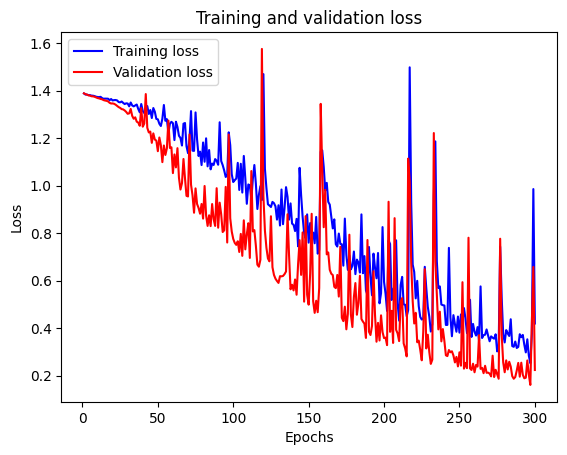

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim()
plt.show()

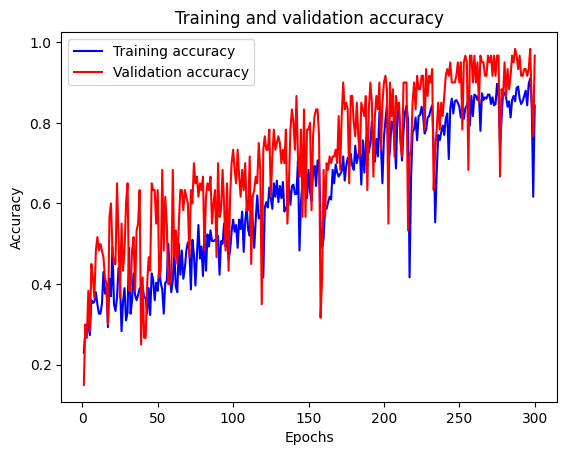

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim()
plt.show()

In [9]:
test_dir="/workspace/colab/multi/multi/test"
test_datagen=ImageDataGenerator(rescale=1./255.0)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),color_mode="rgb",batch_size=10,class_mode='binary')
test_num=test_generator.samples

Found 40 images belonging to 4 classes.


In [10]:
import matplotlib.pyplot as plt
from keras.metrics import AUC
test_image,test_label=next(iter(test_generator))
model.evaluate(test_image,test_label)
test_pred=model.predict(test_image)
predicted = test_pred.argmax(axis=-1)


1/1 [==============================] - 0s 73ms/step


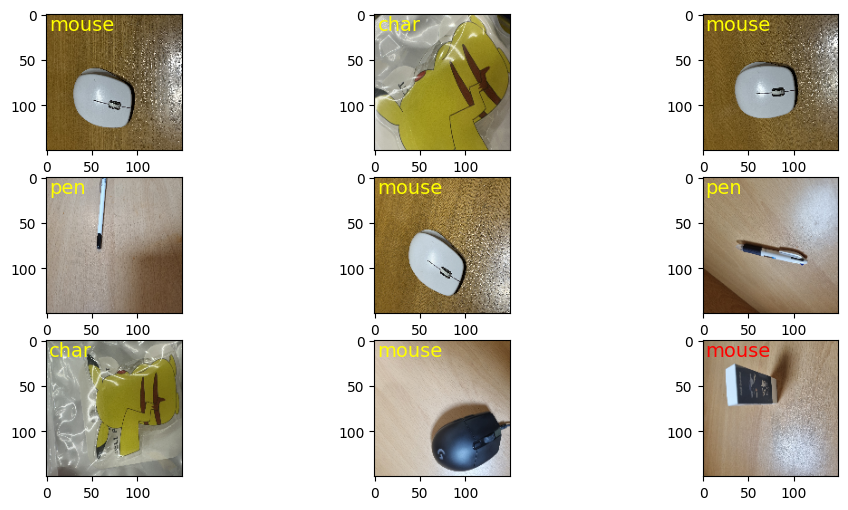

In [11]:
class_names=['char','erazer','mouse','pen']
fig =plt.figure(figsize=(12,6))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(test_image[i,:],cmap=plt.cm.gray_r)
    if predicted[i]==test_label[i]:
        ax.text(3,17,class_names[predicted[i]],color='yellow',fontsize=14)
    else:
        ax.text(3,17,class_names[predicted[i]],color='red',fontsize=14)